In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
dfd = pd.read_csv('../data/first_dose.csv')
dsd = pd.read_csv('../data/second_dose.csv')
dtd = pd.read_csv('../data/total_doses.csv')
dpop = pd.read_csv('../data/uk_population.csv')

In [28]:
dframes = [dfd, dsd, dtd]
for i in dframes:
    display(i.head(3))
    print("----")

,areaType,areaName,areaCode,date,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,dt
0,overview,United Kingdom,K02000001,2021-04-08,96242.0,31903366,2021-04-08
1,overview,United Kingdom,K02000001,2021-04-07,99530.0,31807124,2021-04-07
2,overview,United Kingdom,K02000001,2021-04-06,85227.0,31707594,2021-04-06


----


,areaType,areaName,areaCode,date,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,dt
0,overview,United Kingdom,K02000001,2021-04-08,449269.0,6541174,2021-04-08
1,overview,United Kingdom,K02000001,2021-04-07,408396.0,6091905,2021-04-07
2,overview,United Kingdom,K02000001,2021-04-06,186793.0,5683509,2021-04-06


----


,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,dt
0,overview,United Kingdom,K02000001,2021-04-08,545511.0,38444540,96242.0,31903366,449269.0,6541174,2021-04-08
1,overview,United Kingdom,K02000001,2021-04-07,507926.0,37899029,99530.0,31807124,408396.0,6091905,2021-04-07
2,overview,United Kingdom,K02000001,2021-04-06,272020.0,37391103,85227.0,31707594,186793.0,5683509,2021-04-06


----


In [9]:
dframes = [dfd, dsd, dtd]
for i in dframes:
    display(i.dtypes)
    print("----")

areaType                                      object
areaName                                      object
areaCode                                      object
date                                          object
newPeopleVaccinatedFirstDoseByPublishDate    float64
cumPeopleVaccinatedFirstDoseByPublishDate      int64
dtype: object

----


areaType                                       object
areaName                                       object
areaCode                                       object
date                                           object
newPeopleVaccinatedSecondDoseByPublishDate    float64
cumPeopleVaccinatedSecondDoseByPublishDate      int64
dtype: object

----


areaType                                       object
areaName                                       object
areaCode                                       object
date                                           object
newVaccinesGivenByPublishDate                 float64
cumVaccinesGivenByPublishDate                   int64
newPeopleVaccinatedFirstDoseByPublishDate     float64
cumPeopleVaccinatedFirstDoseByPublishDate       int64
newPeopleVaccinatedSecondDoseByPublishDate    float64
cumPeopleVaccinatedSecondDoseByPublishDate      int64
dtype: object

----


In [24]:
dframes = [dfd, dsd, dtd]
for i in dframes:
    i['dt'] = i['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

In [37]:
cols = [0,1,2,5,7,9]
dtd.drop(dtd.columns[cols],axis=1,inplace=True)

In [66]:
dtd = dtd.rename(columns={"newVaccinesGivenByPublishDate": "total",\
                    "newPeopleVaccinatedFirstDoseByPublishDate": "fd",\
                    "newPeopleVaccinatedSecondDoseByPublishDate":"sd"})

In [70]:
dtd['week'] = dtd['dt'].apply(lambda x: x.isocalendar()[1])

In [ ]:
# weekly max total

In [72]:
dtd.groupby(['week'])['total'].agg('max')

week
1          NaN
2     345525.0
3     493013.0
4     609010.0
5     551470.0
6     549378.0
7     497257.0
8     537266.0
9     494235.0
10    564263.0
11    844285.0
12    694959.0
13    627008.0
14    545511.0
Name: total, dtype: float64

In [73]:
import dataprep

generated new fontManager


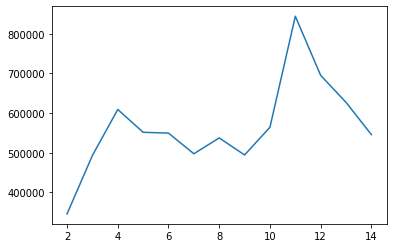

In [80]:

plt.plot(dtd.groupby(['week'])['total'].agg('max'))

AttributeError: module 'dataprep' has no attribute 'eda'

In [71]:
dtd.head()

,date,total,fd,sd,dt,week
0,2021-04-08,545511.0,96242.0,449269.0,2021-04-08,14
1,2021-04-07,507926.0,99530.0,408396.0,2021-04-07,14
2,2021-04-06,272020.0,85227.0,186793.0,2021-04-06,14
3,2021-04-05,105334.0,40744.0,64590.0,2021-04-05,14
4,2021-04-04,95763.0,48055.0,47708.0,2021-04-04,13


In [55]:
dtd.dt[25].isocalendar()[1]

10